# Implementing a Neural Network Using the Keras Framework

    - Lets explore keras and implement a classification model using the mnist database!
    - certainly easier than Tf as its easier to prototype a neural network as ease. Lets explore
    
Reference : https://www.youtube.com/watch?v=_6nQpjc-G90   

In [6]:
"""Lets begin importing keras first, along with the datasets
"""

import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Next: Lets break down the data 
- Note that there are 70K total examples. We split into 60K training data and 10K test data 

In [19]:
train_images = mnist_train_images.reshape(60000,784).astype('float32')
test_images = mnist_test_images.reshape(10000,784).astype('float32')
train_images = train_images/255
test_images = test_images/255

# Converting the 0-9 labels into one-hot format

- Remember that the softmax regression problem will result in a 10 layer output. 0-9 classifications. Hence we convert our labels into one-hot encoded format

Note that even though we went over one-hot encoding and its importance in Andre Ng's course, here are some refresher articles to complement your understanding of the same
- Quora: https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science
- fast.ai: http://forums.fast.ai/t/to-label-encode-or-one-hot-encode/6057/4 

In [23]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

# Lets take a look at one of our training images

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


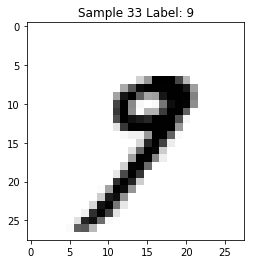

In [57]:
# taking this directly from reference article

import matplotlib.pyplot as plt

def display_sample(num):
    #print the one-hot array of this samples label
    print (train_labels[num])
    
    # print the label copnverted back to a number
    label = train_labels[num].argmax(axis=0)
    
    #reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample %d Label: %d' % (num,label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    %matplotlib inline  

display_sample(33)    

# Lets build out the Neural Network!

In [33]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model.add(Dense(10, activation = 'softmax'))          

In [34]:
# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


<h2> Lets optimize our model (using RMSprop) </h2> 

In [35]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(),
              metrics  = ['accuracy'])

In [37]:
history  = model.fit(train_images, train_labels, 
                     batch_size=100,
                     epochs=10,
                     verbose=2,
                     validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2403 - acc: 0.9302 - val_loss: 0.1130 - val_acc: 0.9648
Epoch 2/10
 - 6s - loss: 0.0966 - acc: 0.9708 - val_loss: 0.0871 - val_acc: 0.9741
Epoch 3/10
 - 7s - loss: 0.0634 - acc: 0.9808 - val_loss: 0.0741 - val_acc: 0.9776
Epoch 4/10
 - 7s - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0772 - val_acc: 0.9761
Epoch 5/10
 - 7s - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0631 - val_acc: 0.9810
Epoch 6/10
 - 7s - loss: 0.0262 - acc: 0.9922 - val_loss: 0.0753 - val_acc: 0.9793
Epoch 7/10
 - 6s - loss: 0.0206 - acc: 0.9941 - val_loss: 0.0680 - val_acc: 0.9816
Epoch 8/10
 - 7s - loss: 0.0161 - acc: 0.9953 - val_loss: 0.0746 - val_acc: 0.9811
Epoch 9/10
 - 7s - loss: 0.0123 - acc: 0.9964 - val_loss: 0.0736 - val_acc: 0.9807
Epoch 10/10
 - 6s - loss: 0.0090 - acc: 0.9975 - val_loss: 0.0731 - val_acc: 0.9821


In [39]:
score = model.evaluate(test_images, test_labels, verbose=0)
print ('test loss: ', score[0])
print ('test accuracy: ', score[1])

test loss:  0.07308886726095316
test accuracy:  0.9821


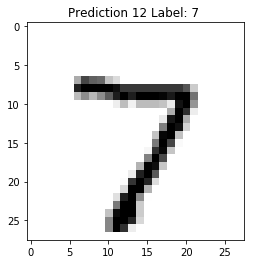

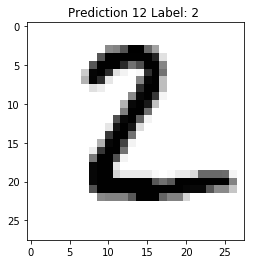

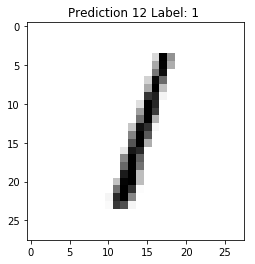

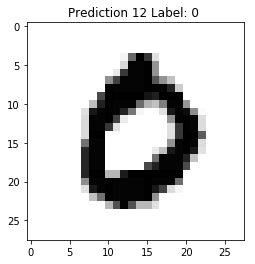

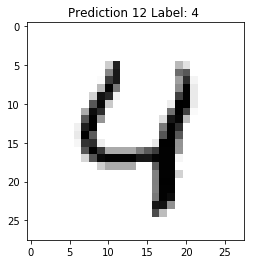

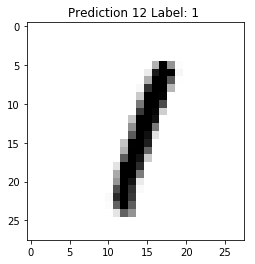

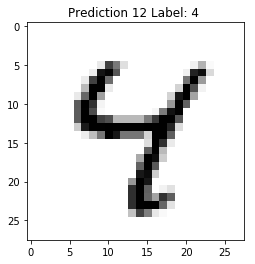

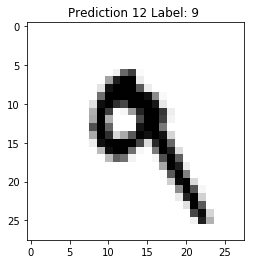

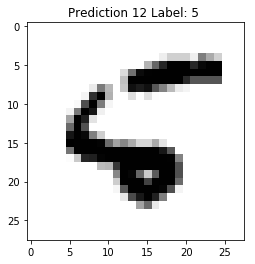

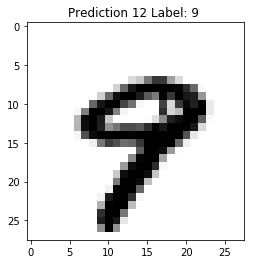

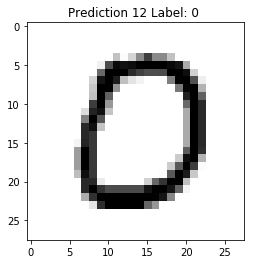

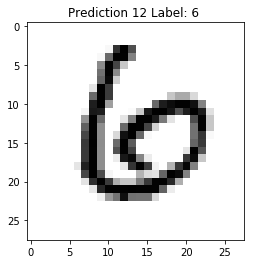

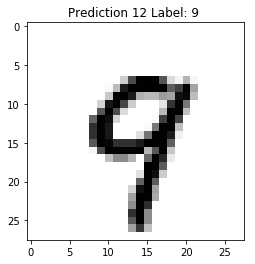

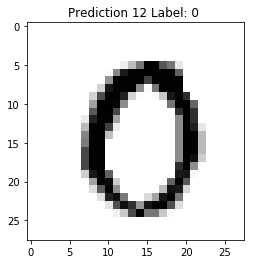

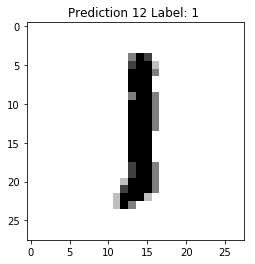

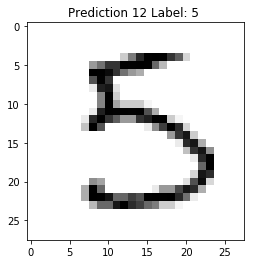

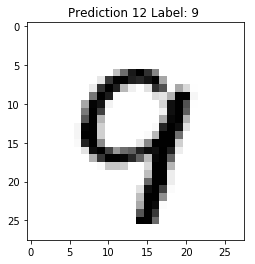

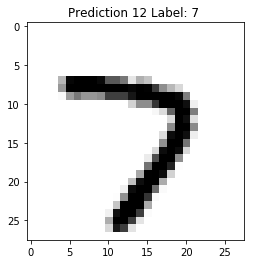

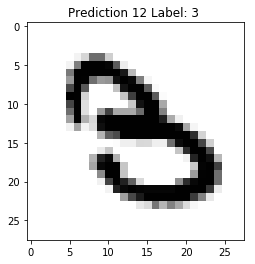

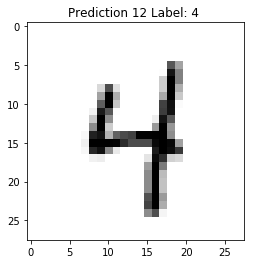

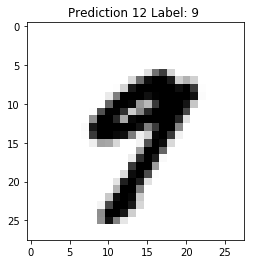

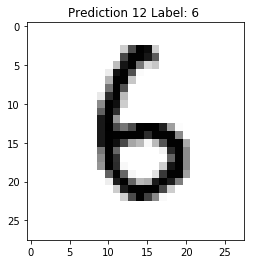

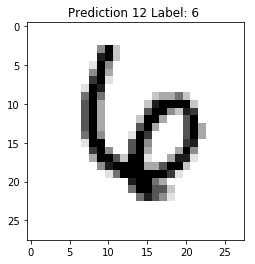

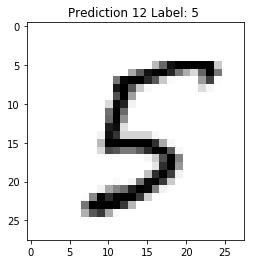

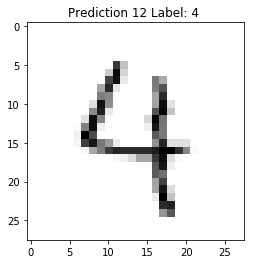

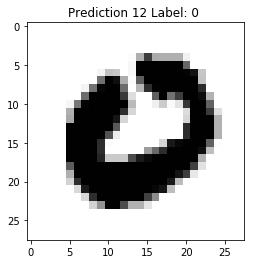

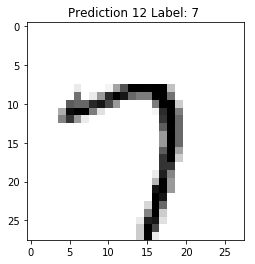

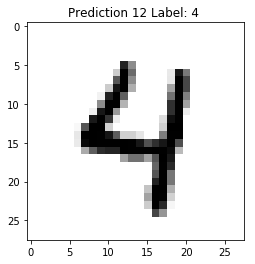

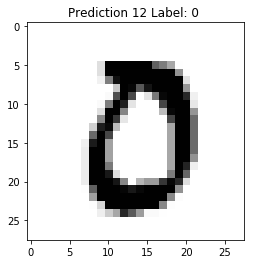

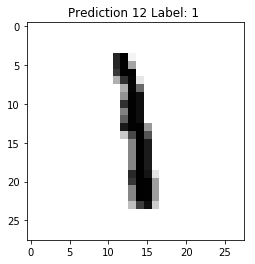

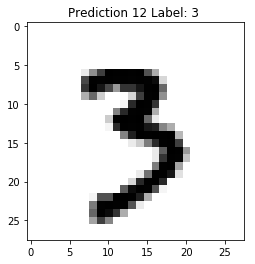

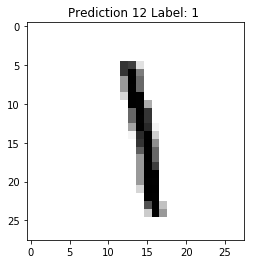

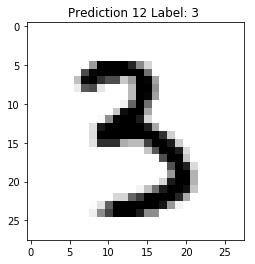

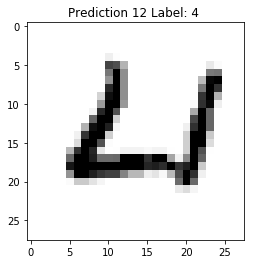

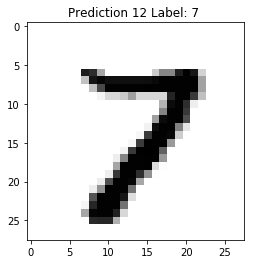

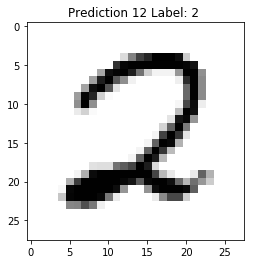

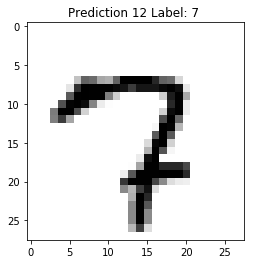

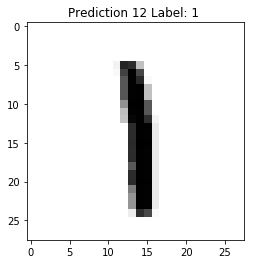

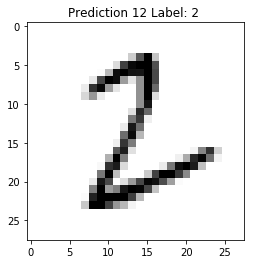

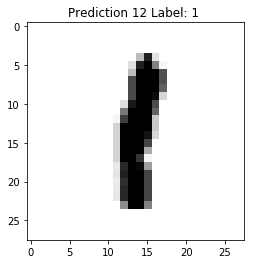

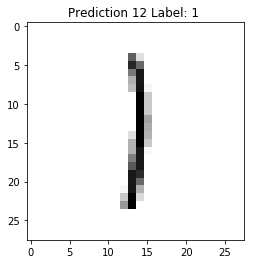

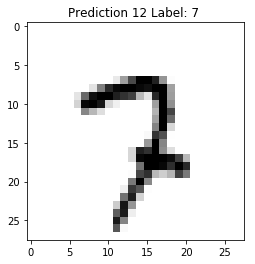

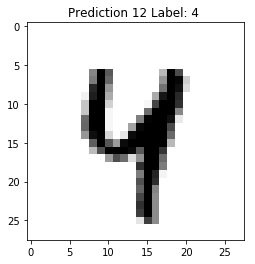

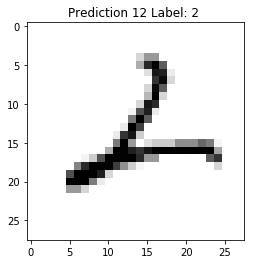

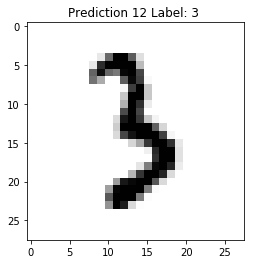

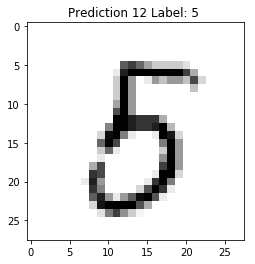

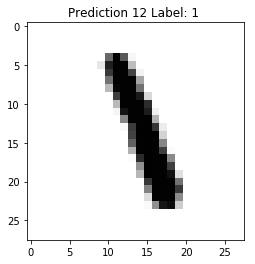

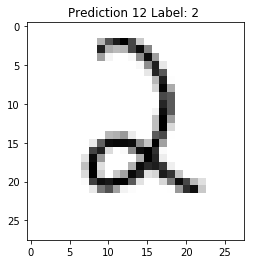

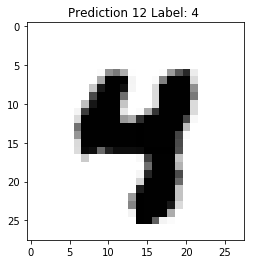

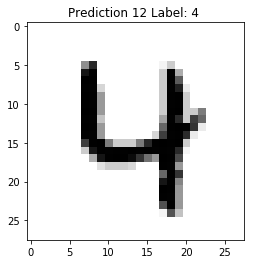

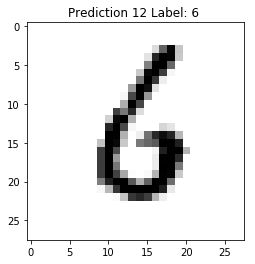

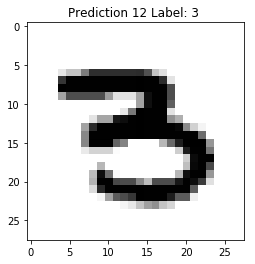

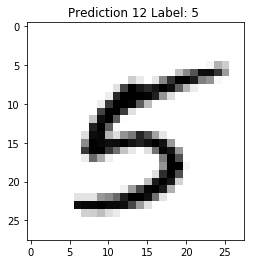

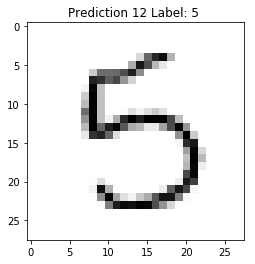

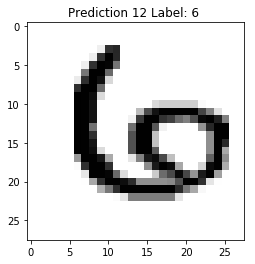

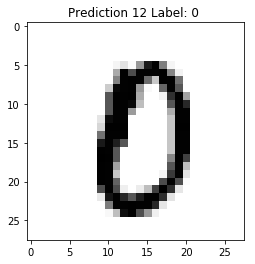

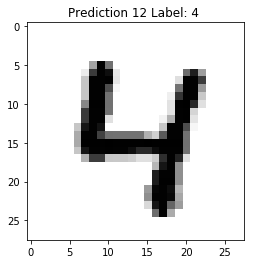

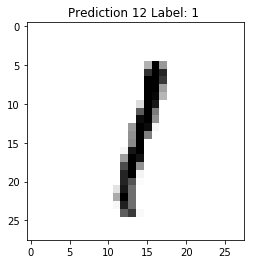

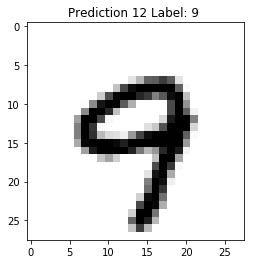

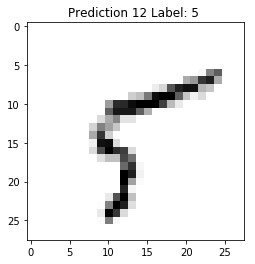

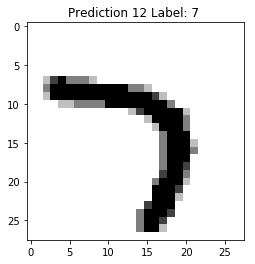

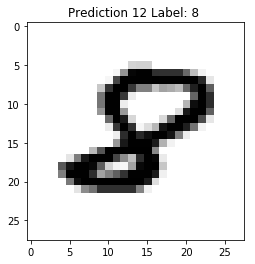

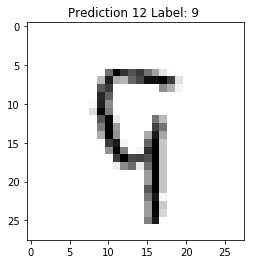

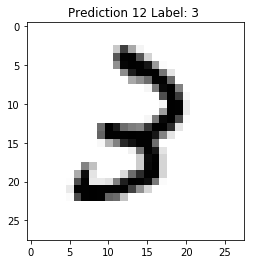

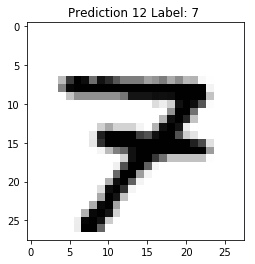

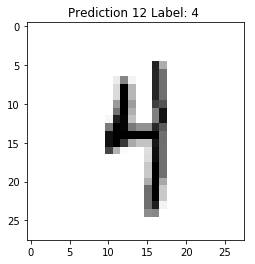

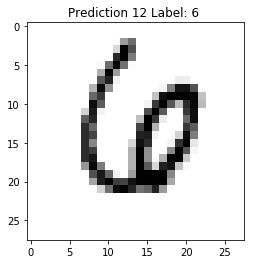

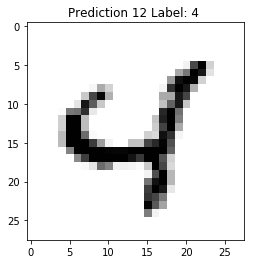

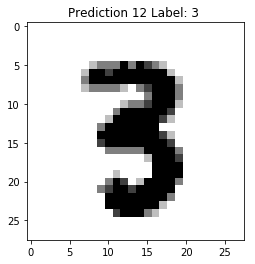

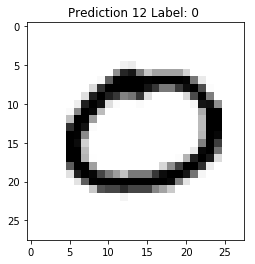

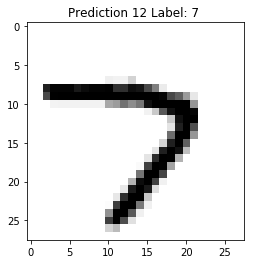

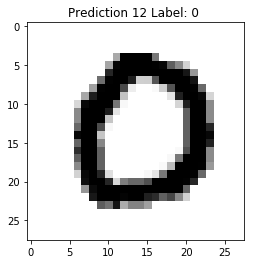

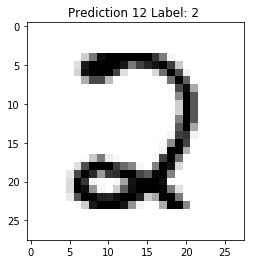

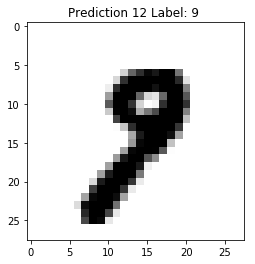

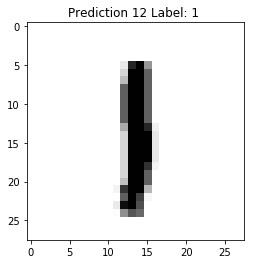

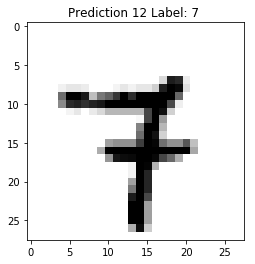

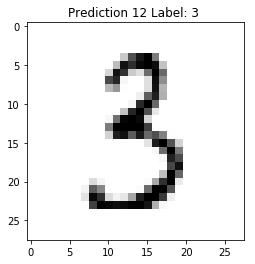

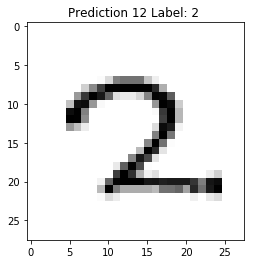

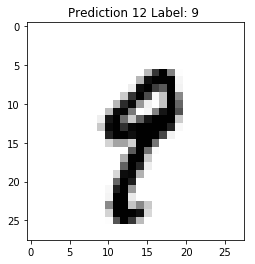

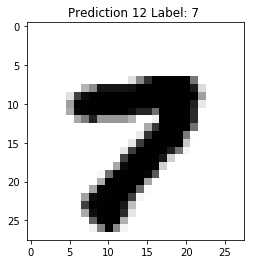

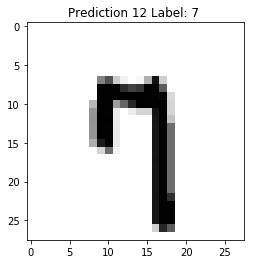

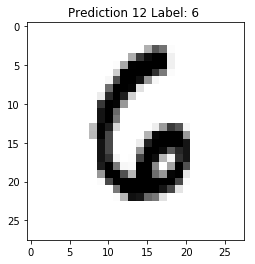

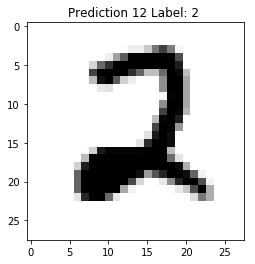

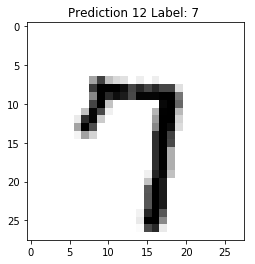

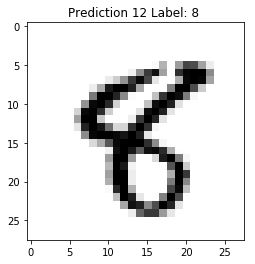

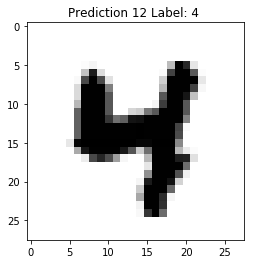

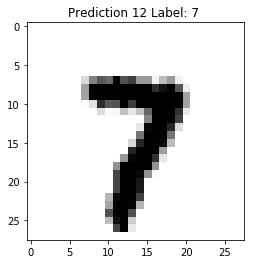

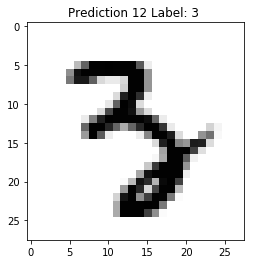

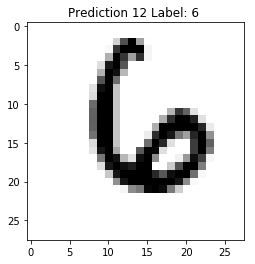

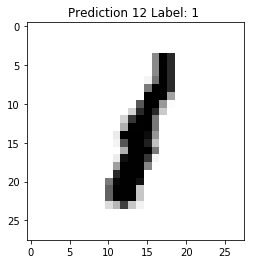

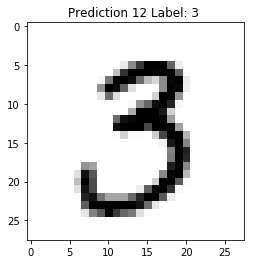

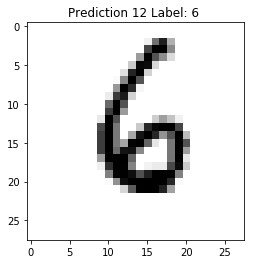

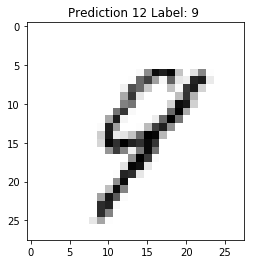

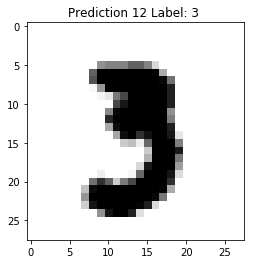

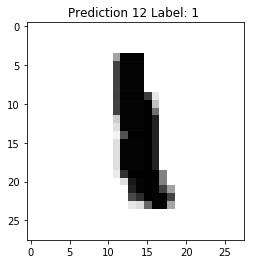

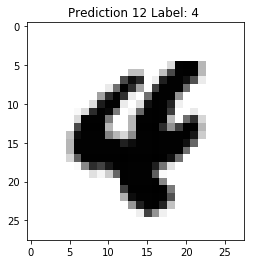

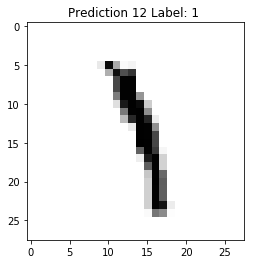

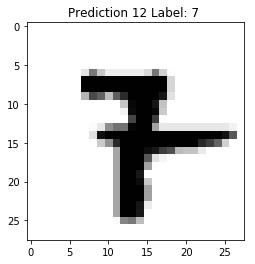

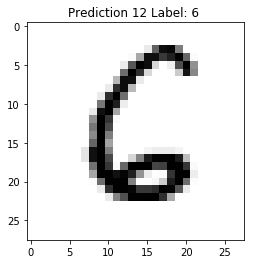

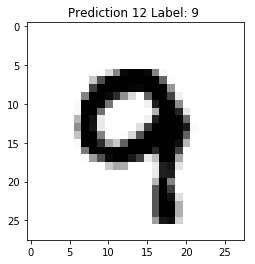

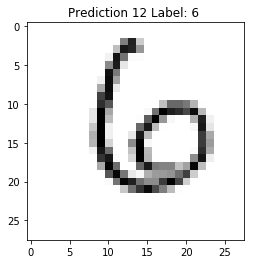

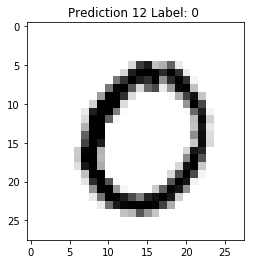

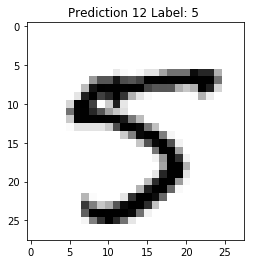

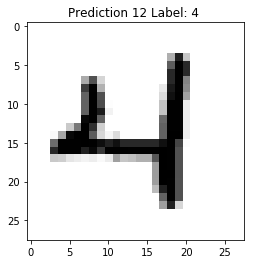

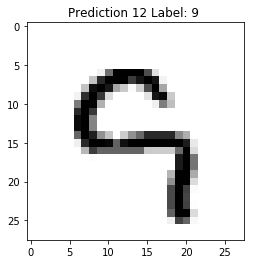

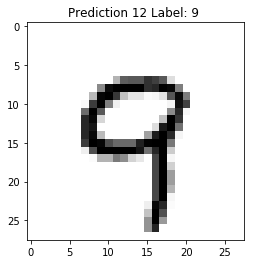

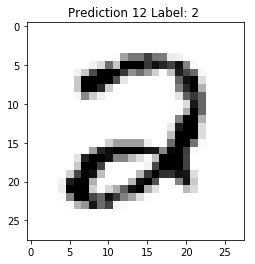

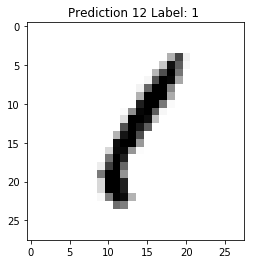

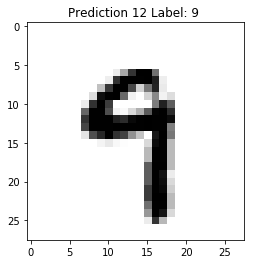

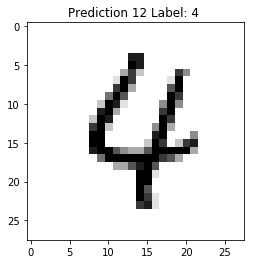

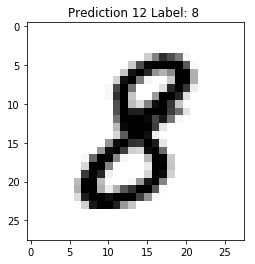

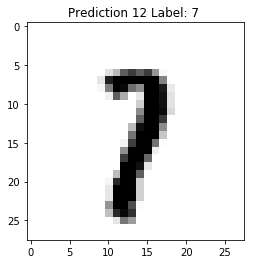

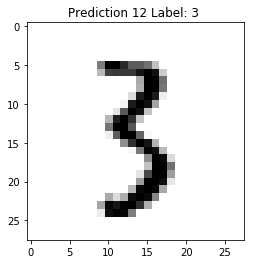

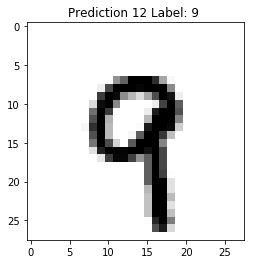

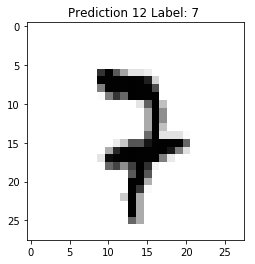

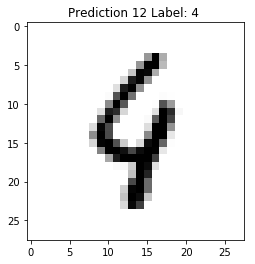

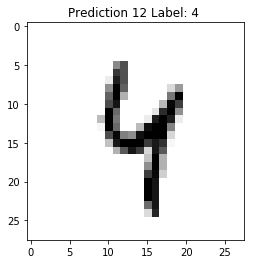

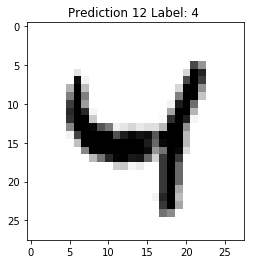

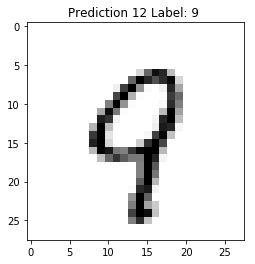

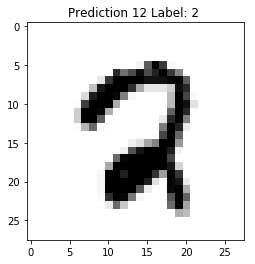

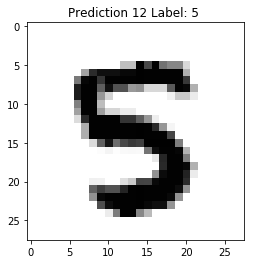

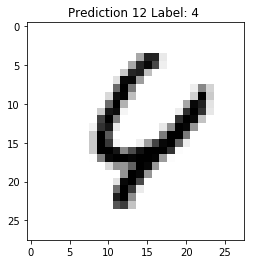

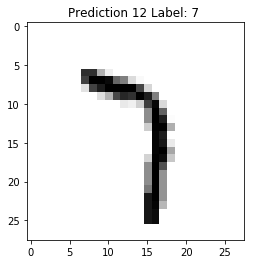

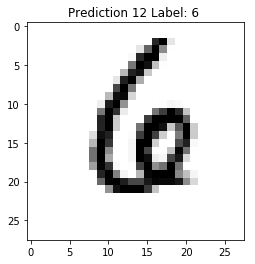

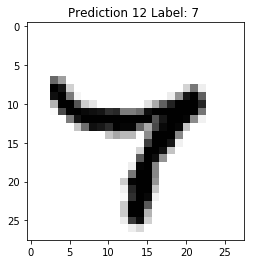

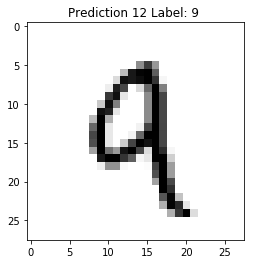

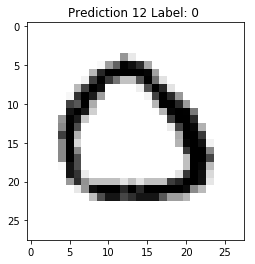

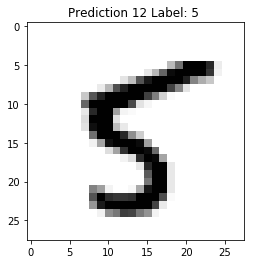

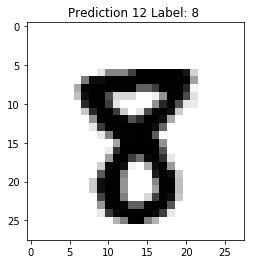

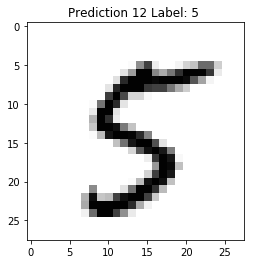

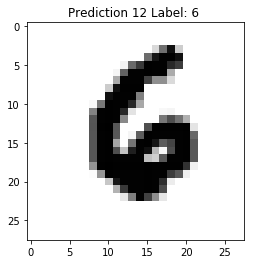

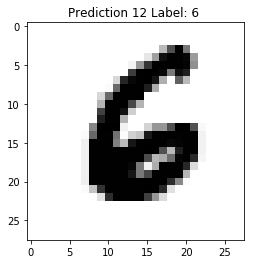

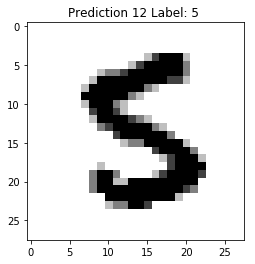

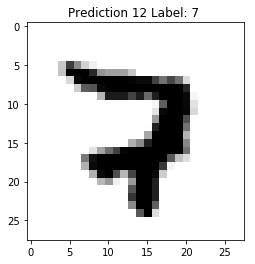

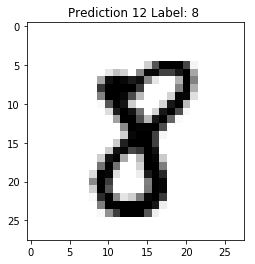

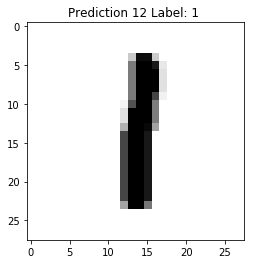

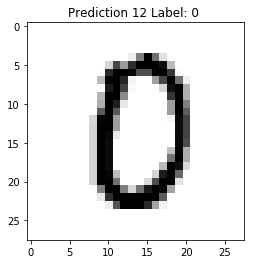

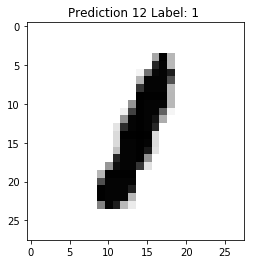

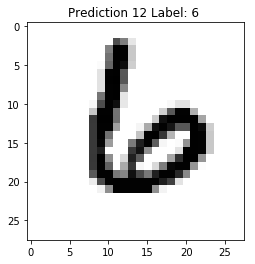

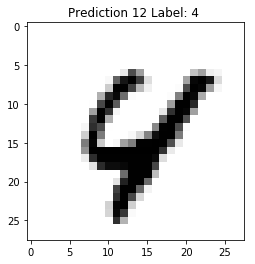

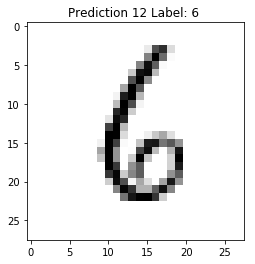

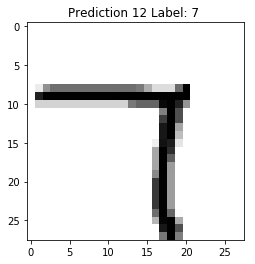

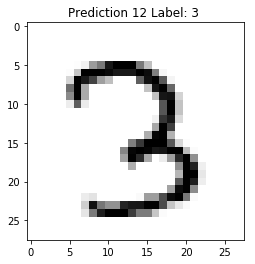

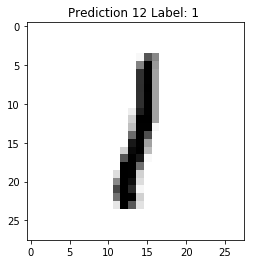

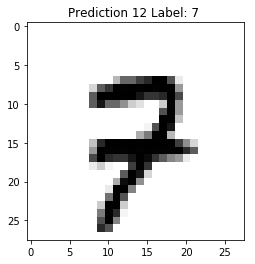

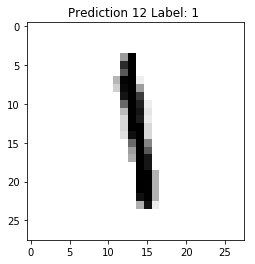

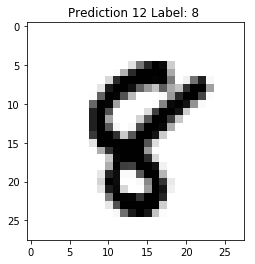

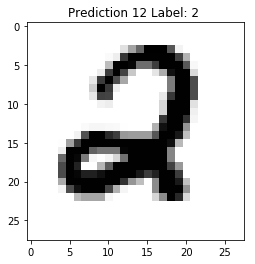

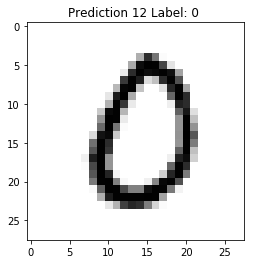

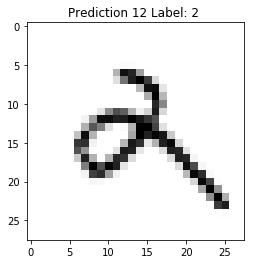

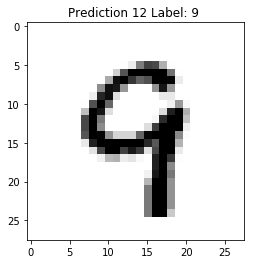

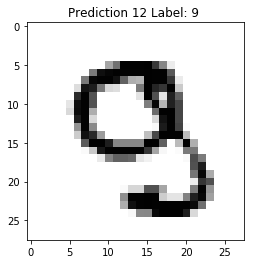

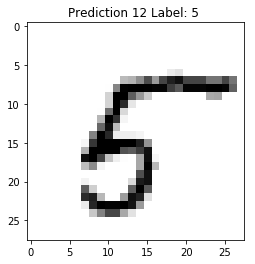

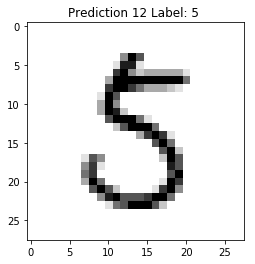

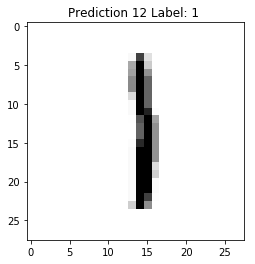

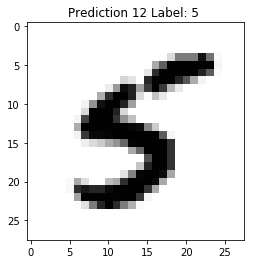

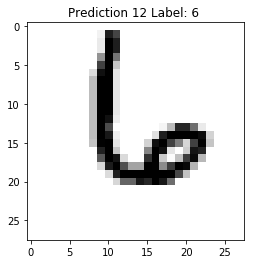

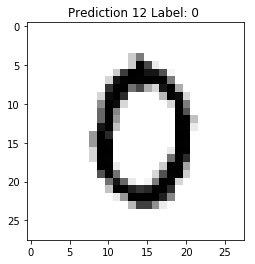

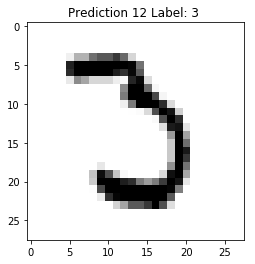

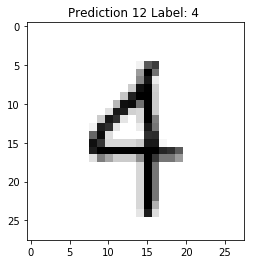

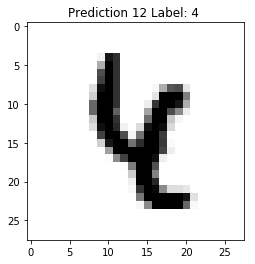

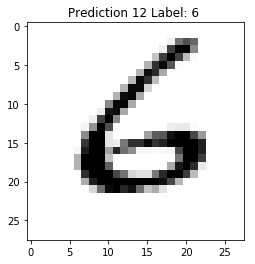

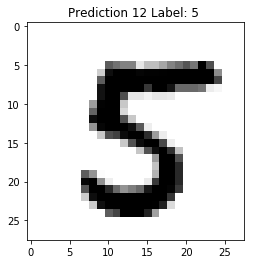

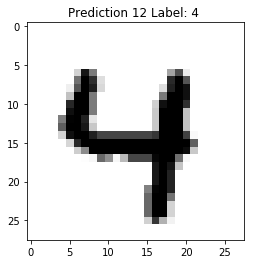

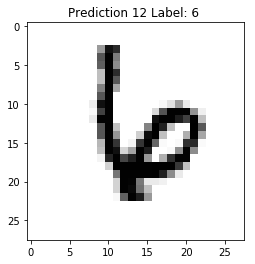

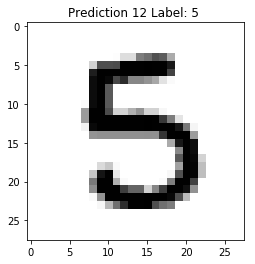

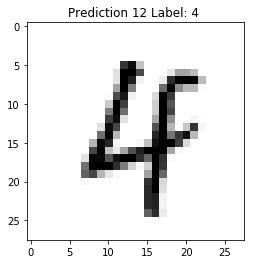

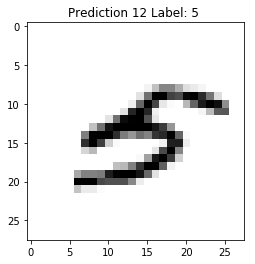

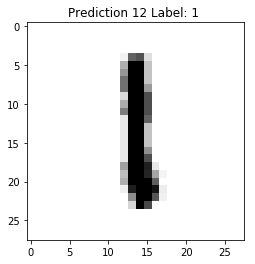

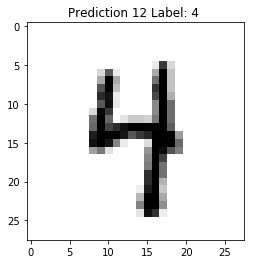

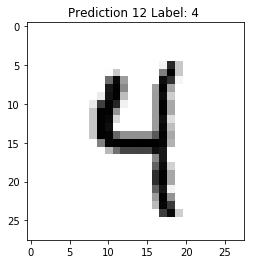

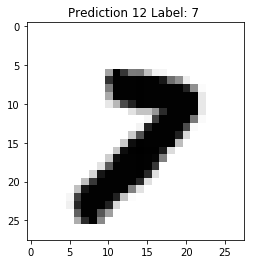

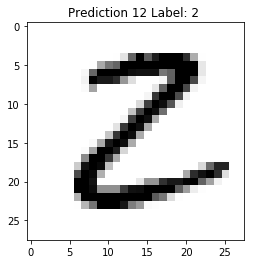

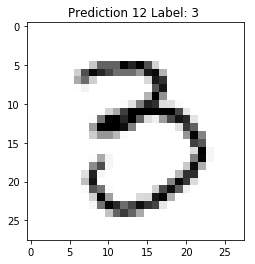

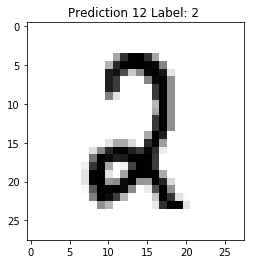

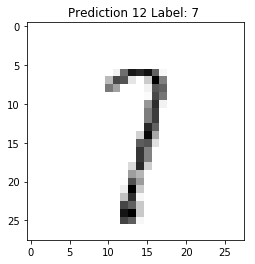

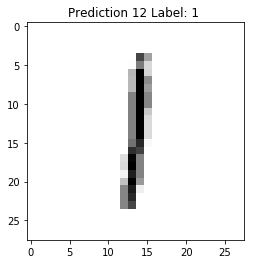

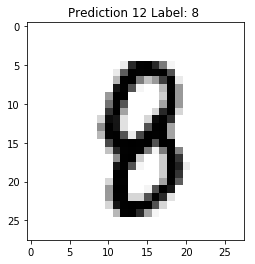

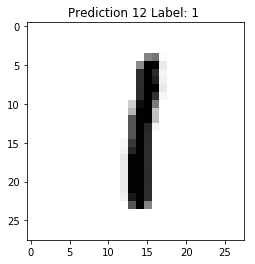

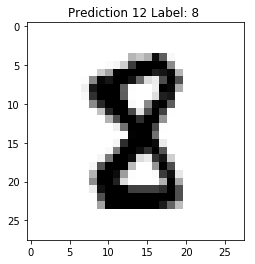

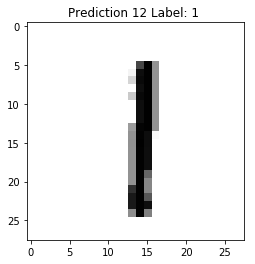

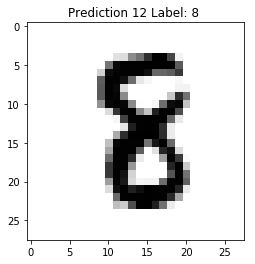

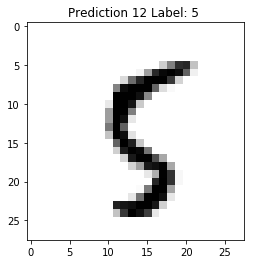

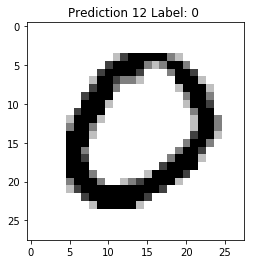

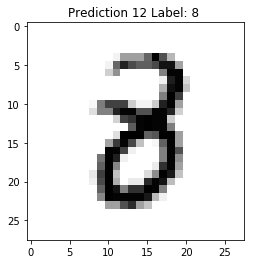

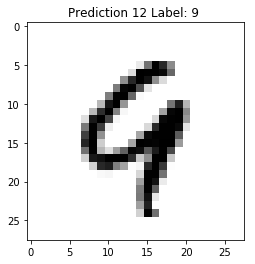

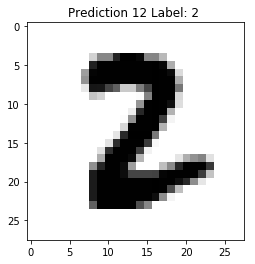

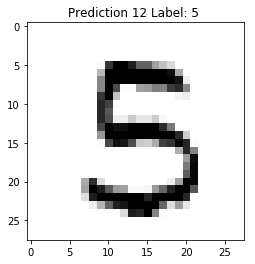

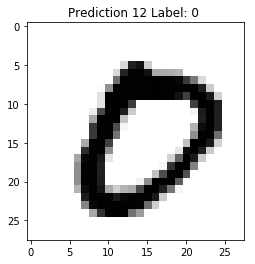

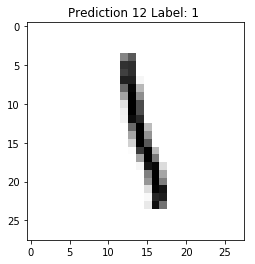

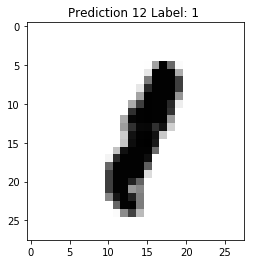

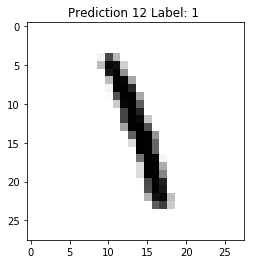

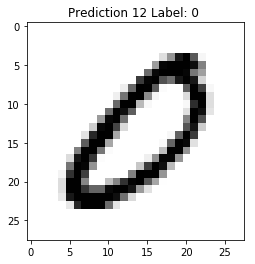

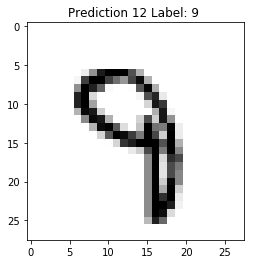

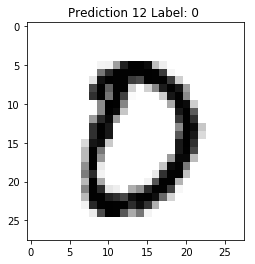

In [ ]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_images).argmax()
    label = test_labels[x].argmax()
    if predicted_cat != label:
        plt.title('Prediction %d Label: %d ' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap = plt.get_cmap('gray_r'))
        plt.show()


In [56]:
train_labels[33].argmax()

9

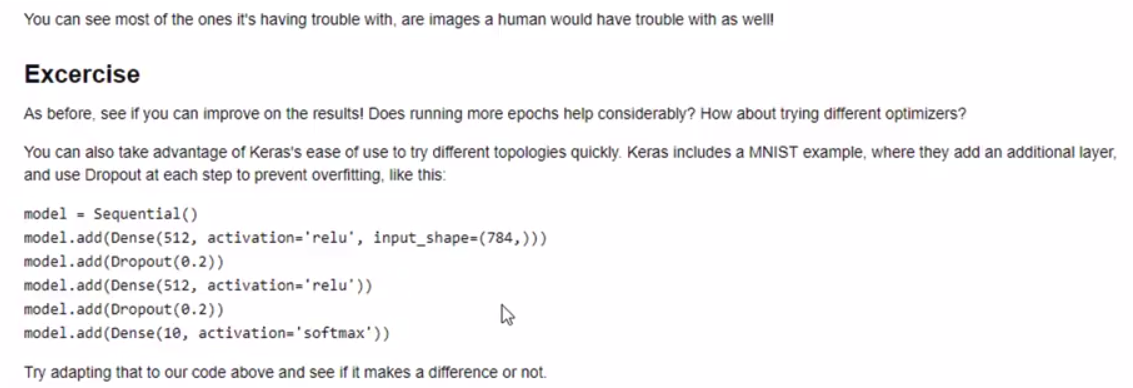